# Algoritmo K-means

In [1]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

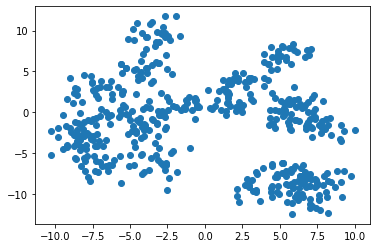

In [2]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

In [3]:
# número ótimo de cluster
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [4]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


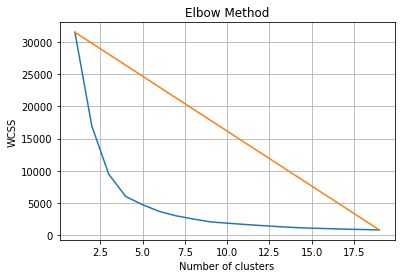

In [15]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [16]:
print('O número de clusters é ', kmeans.n_clusters)

O número de clusters é  19


In [17]:
print('A coordenada do ponto é ', kmeans.cluster_centers_)

A coordenada do ponto é  [[ -6.42597975  -0.36533334]
 [  6.14473577   1.19614302]
 [  5.1175193   -7.09777681]
 [ -7.21280783  -6.46983251]
 [  2.37507021   3.4915192 ]
 [ -3.3454861    9.65119238]
 [ -4.03657623  -1.91823679]
 [  6.97176513 -10.84276709]
 [ -8.39678823  -3.0520213 ]
 [  5.27115994   6.94176657]
 [ -3.25985437  -6.14614828]
 [  3.54215992  -9.55494359]
 [  5.20789434  -0.84367044]
 [ -4.0620404    5.31119262]
 [ -2.28039985   0.59329307]
 [ -7.23407308   2.77010428]
 [  0.92616421   1.01572559]
 [  7.19420415  -8.40309998]
 [  7.84426122  -1.74254472]]


In [18]:
print('A soma dos quadrados inter-clusters é ', kmeans.inertia_)

A soma dos quadrados inter-clusters é  793.5035034374113
